In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits

In [3]:
import os

base_dir = '/Users/vitorclara/Documents/Técnico/LA/'  # diretório do projeto
color = 'blue'  # escolha: 'blue', 'green', 'red', 'black'

# caminhos
sci_dir = os.path.join(base_dir, f'm57_{color}')
bias_path = os.path.join(base_dir, 'bias', 'master_bias.fits')
flat_path = os.path.join(base_dir, f'flats_{color}', f'master_flat_{color}.fits')

# escolher automaticamente um ficheiro de ciência (primeiro .fits)
science_files = sorted([f for f in os.listdir(sci_dir) if f.lower().endswith('.fits')])
assert science_files, f'Sem ficheiros .fits em {sci_dir}'
science_path = os.path.join(sci_dir, science_files[0])

# carregar dados
science = fits.getdata(science_path)
master_bias = fits.getdata(bias_path)
master_flat = fits.getdata(flat_path)

In [4]:
# diretório com as imagens (BLACK)
dir_path = os.path.join(base_dir, 'm57_black')
master_flat_black = fits.getdata(os.path.join(base_dir, 'flats_black', 'master_flat_black.fits'))

science_black = []
files = sorted([f for f in os.listdir(dir_path) if f.lower().endswith('.fits')])
for i, file in enumerate(files, start=1):
    filepath = os.path.join(dir_path, file)
    data = fits.getdata(filepath)
    science_black.append(data)

In [5]:
science_calibrated_black = []
for i, img in enumerate(science_black, start=1):
    calibrated = (img - master_bias) / master_flat_black
    science_calibrated_black.append(calibrated)

In [6]:
# diretório com as imagens (BLUE)
dir_path = os.path.join(base_dir, 'm57_blue')
master_flat_blue = fits.getdata(os.path.join(base_dir, 'flats_blue', 'master_flat_blue.fits'))

science_blue = []
files = sorted([f for f in os.listdir(dir_path) if f.lower().endswith('.fits')])
for i, file in enumerate(files, start=1):
    filepath = os.path.join(dir_path, file)
    data = fits.getdata(filepath)
    science_blue.append(data)

In [7]:
science_calibrated_blue = []
for i, img in enumerate(science_blue, start=1):
    calibrated = (img - master_bias) / master_flat_blue
    science_calibrated_blue.append(calibrated)

In [8]:
# diretório com as imagens (GREEN)
dir_path = os.path.join(base_dir, 'm57_green')
master_flat_green = fits.getdata(os.path.join(base_dir, 'flats_green', 'master_flat_green.fits'))

science_green = []
files = sorted([f for f in os.listdir(dir_path) if f.lower().endswith('.fits')])
for i, file in enumerate(files, start=1):
    filepath = os.path.join(dir_path, file)
    data = fits.getdata(filepath)
    science_green.append(data)

In [9]:
science_calibrated_green = []
for i, img in enumerate(science_green, start=1):
    calibrated = (img - master_bias) / master_flat_green
    science_calibrated_green.append(calibrated)

In [10]:
# diretório com as imagens (RED)
dir_path = os.path.join(base_dir, 'm57_red')
master_flat_red = fits.getdata(os.path.join(base_dir, 'flats_red', 'master_flat_red.fits'))

science_red = []
files = sorted([f for f in os.listdir(dir_path) if f.lower().endswith('.fits')])
for i, file in enumerate(files, start=1):
    filepath = os.path.join(dir_path, file)
    data = fits.getdata(filepath)
    science_red.append(data)

In [11]:
science_calibrated_red = []
for i, img in enumerate(science_red, start=1):
    calibrated = (img - master_bias) / master_flat_red
    science_calibrated_red.append(calibrated)

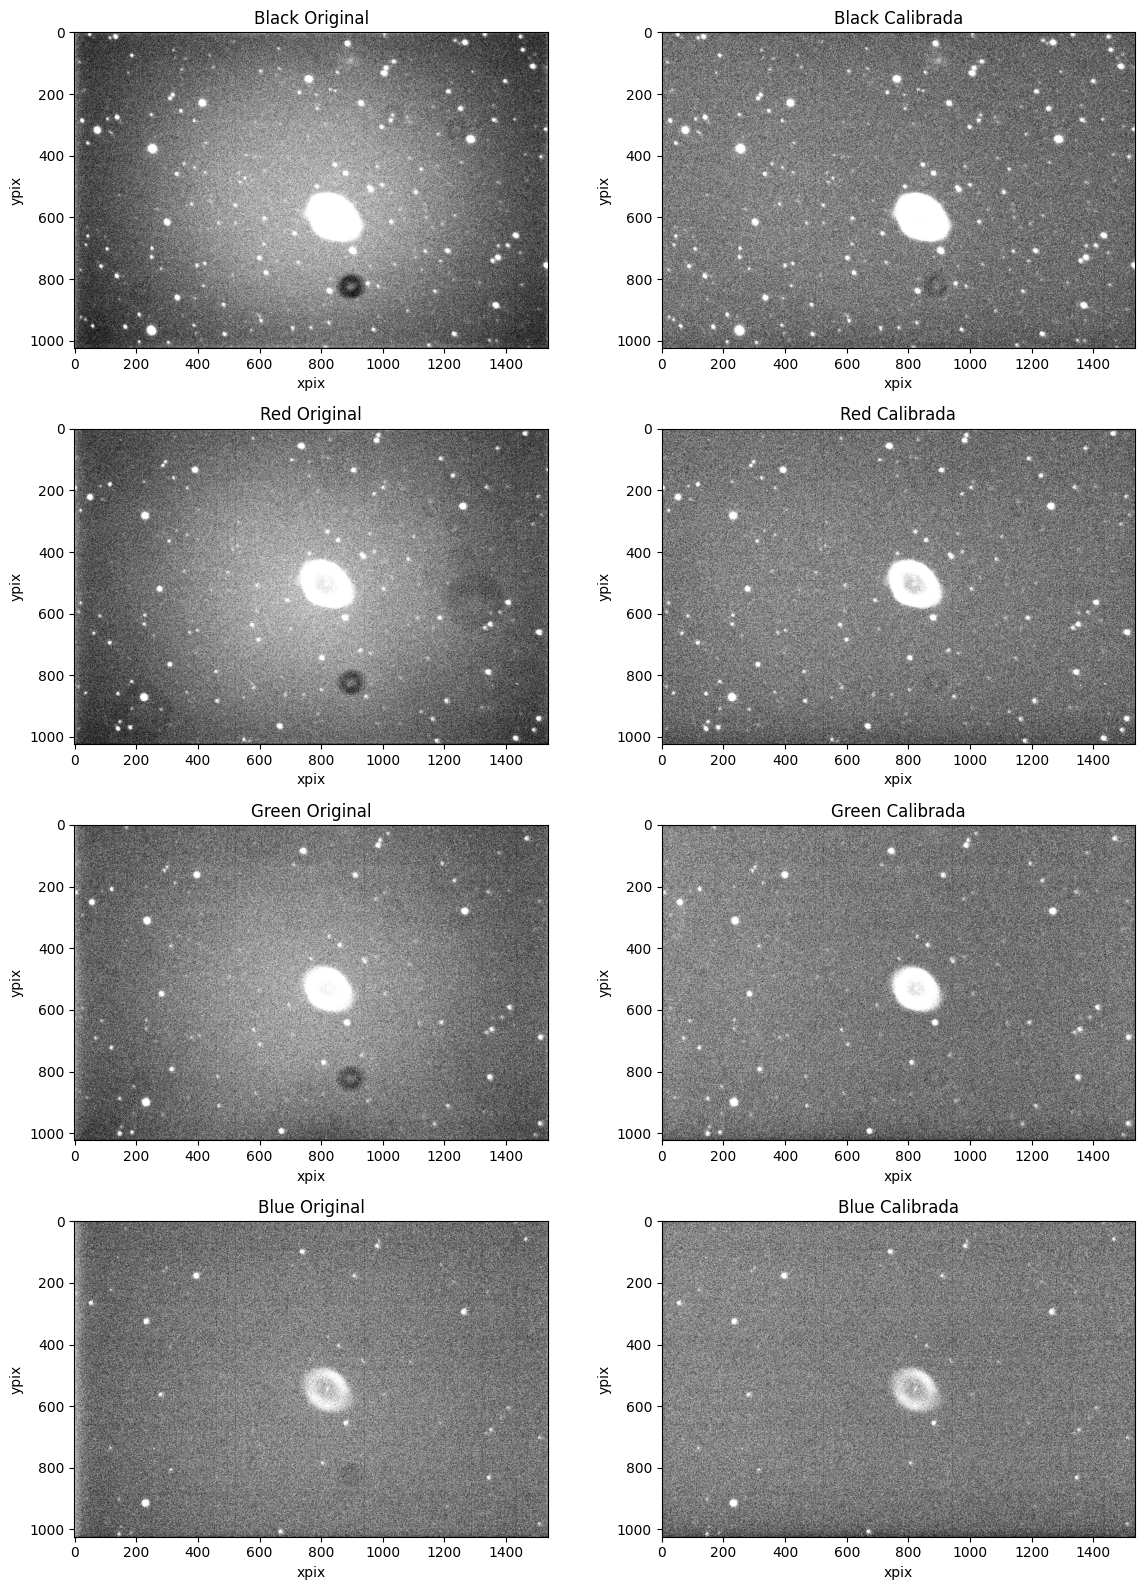

In [12]:
# Função utilitária para mostrar uma imagem com percentis
def show_image(ax, img, title="", cmap="gray", pmin=5, pmax=95):
    """
    Mostra uma imagem FITS em um Axes de matplotlib com escala baseada em percentis.

    Args:
        ax    : Axes do matplotlib onde desenhar
        img   : matriz da imagem (numpy array)
        title : título do subplot
        cmap  : colormap
        pmin  : percentil mínimo para contraste
        pmax  : percentil máximo para contraste
    """
    lo, up = np.percentile(img, pmin), np.percentile(img, pmax)
    im = ax.imshow(img, cmap=cmap, clim=(lo, up))
    ax.set_title(title)
    ax.set_xlabel("xpix")
    ax.set_ylabel("ypix")
    return im


categorias = {
    "Black": (science_black, science_calibrated_black),
    "Red":   (science_red, science_calibrated_red),
    "Green": (science_green, science_calibrated_green),
    "Blue":  (science_blue, science_calibrated_blue)
}

# Criar figura com 4 linhas (uma por cor) e 2 colunas (original vs calibrada)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

for row, (cor, (originais, calibradas)) in enumerate(categorias.items()):
    i = 3  # Índice da imagem a mostrar (podes alterar se quiseres outra)

    # Original
    show_image(axes[row, 0], originais[i], title=f"{cor} Original")

    # Calibrada
    show_image(axes[row, 1], calibradas[i], title=f"{cor} Calibrada")

plt.tight_layout()
plt.show()